In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#Task 1

In [177]:
file_path = "2022_june_dev.csv"
data = pd.read_csv(file_path)

print(data.head(5))

   salary position        experience              city tech  freq
0    1400   Middle  від 4 до 6 років           Вінниця    C     1
1    4500   Senior  від 4 до 6 років           Вінниця    C     1
2    3800   Senior    понад 10 років            Дніпро    C     1
3    2550   Middle  від 1 до 3 років  Івано-Франківськ    C     1
4    1500   Junior  від 1 до 3 років              Інше    C     1


#Task 2

**A**

In [52]:
check_values = [None, np.nan, np.NaN]

print(data.isnull().values.any())

False


**B**

In [10]:
for column in data.columns:
    print(f"Column: {column}")
    print(data[column].unique(), end='\n\n')

Column: salary
[ 1400  4500  3800  2550  1500   678  2000  2730  3200  4000  5000  3400
 19000  1000  1600  5170  5800  5300   760   950  1100  2300   610  8333
  3000  7000  2400  3500  4200  2500  2700  4400  1850  2100  6000  6200
   400   800  7400  1140  1250  1350  1450   500   900  1300  1650  1700
  1764  1800   550  1200  5225  1330  2185  3040  3300  6500  3750  5460
  4275  6600   475  7030  8000  8500 11250  4600  5360  5500   665   850
   930  2800  2900  3330  4250  4300  3600  6400  3990  5700  6860  6150
   700  1900  2200  2320  2375  2600  3280  5200  7500  2250  2750  3700
  5100  4800  4940  3900  4700   300   780  1080  1232  1590   530   580
   600   730   750   810   880  1282  1425  1477  1720  1735  2090  2350
  2450  2850  3100  3285  3325  3350  3450  4150  4750  5400  6250  4950
  6300  6800  1950  1890  2050  2980  2992  4055  4450  5600  5900  6175
  7410  7600  8100  6100  6270  6550  6650   533  4560  5931   350   320
   535   650   840  7100  7200  8200

**C**

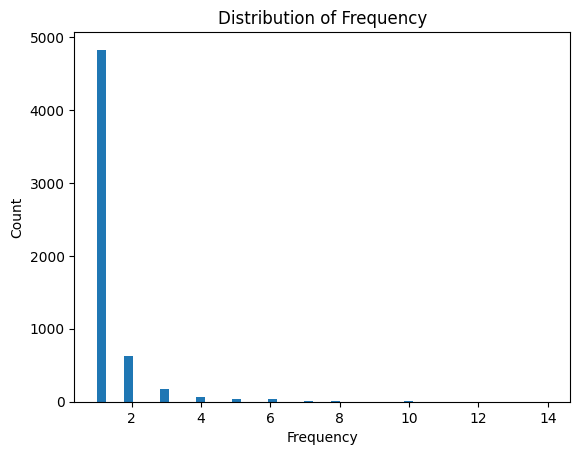

In [36]:
plt.hist(data['freq'], bins=50)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Distribution of Frequency')
plt.show()

Analyzing the distribution of the freq column can provide insights into how frequently certain occurrences or patterns appear in the dataset. This information might be useful for certain machine learning models or statistical analyses, such as detecting patterns related to specific frequencies.

#Task 3

**A**

In [178]:
print(data.head(10), end='\n\n\n\n')

data['experience'] = data['experience'].str.findall(r'(\d+)')
data['experience'] = data['experience'].apply(lambda x: [int(val) for val in x])
data['experience'] = data['experience'].apply(lambda x: np.prod(x) if len(x) == 2 else x[0] ** 2 if len(x) == 1 else 0)

print(data.head(15))

   salary position        experience              city tech  freq
0    1400   Middle  від 4 до 6 років           Вінниця    C     1
1    4500   Senior  від 4 до 6 років           Вінниця    C     1
2    3800   Senior    понад 10 років            Дніпро    C     1
3    2550   Middle  від 1 до 3 років  Івано-Франківськ    C     1
4    1500   Junior  від 1 до 3 років              Інше    C     1
5     678   Junior  від 1 до 3 років              Інше    C     1
6    2000   Middle  від 1 до 3 років              Інше    C     1
7    2730   Middle  від 1 до 3 років              Інше    C     1
8    3800   Middle  від 1 до 3 років              Інше    C     1
9    3200   Middle  від 4 до 6 років              Інше    C     1



    salary   position  experience              city tech  freq
0     1400     Middle          24           Вінниця    C     1
1     4500     Senior          24           Вінниця    C     1
2     3800     Senior         100            Дніпро    C     1
3     2550     Midd

**B**

In [179]:
map_positions = {'Middle' : 0,
                 'Senior' : 1,
                 'Junior' : 2,
                 'Tech Lead' : 3,
                 'Team Lead' : 4,
                 'Intern/Trainee' : 5,
                 'Architect' : 6,
                 }

#['Middle' 'Senior' 'Junior' 'Tech Lead' 'Team Lead' 'Intern/Trainee' 'Architect']

map_positions_r = {v: k for k, v in map_positions.items()}

data['position'] = data['position'].map(map_positions)
#print(data.head(15), end='\n\n\n\n')
#-----------------------------------------------

map_tech = {'C' : 0,
                 'C#/.NET' : 1,
                 'C++' : 2,
                 'Clojure' : 3,
                 'Java' : 4,
                 'JavaScript' : 5,
                 'Kotlin' : 6,
                 'Objective-C' : 7,
                 'PHP' : 8,
                 'Python' : 9,
                 'Ruby' : 10,
                 'Swift' : 11,
                 'TypeScript' : 12,
                 'Інша' : 13,
                 }

map_tech_r = {v: k for k, v in map_tech.items()}

data['tech'] = data['tech'].map(map_tech)

#['C' 'C#/.NET' 'C++' 'Clojure' 'Java' 'JavaScript' 'Kotlin' 'Objective-C' 'PHP' 'Python' 'Ruby' 'Swift' 'TypeScript' 'Інша']

#-----------------------------------------------

city = LabelEncoder()
  
data['city']= city.fit_transform(data['city'])
print(data.head(15), end='\n\n\n\n')

    salary  position  experience  city  tech  freq
0     1400         0          24     2     0     1
1     4500         1          24     2     0     1
2     3800         1         100     3     0     1
3     2550         0           3     0     0     1
4     1500         2           3     1     0     1
5      678         2           3     1     0     1
6     2000         0           3     1     0     1
7     2730         0           3     1     0     1
8     3800         0           3     1     0     1
9     3200         0          24     1     0     1
10    4000         0          24     1     0     1
11    5000         1          24     1     0     1
12    5000         3          24     1     0     1
13    3400         0          70     1     0     1
14   19000         1          70     1     0     1





#Task 4

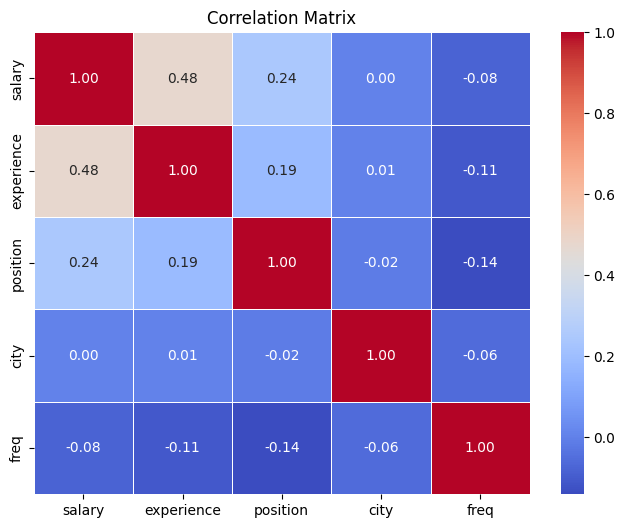

In [180]:
columns = ['salary', 'experience', 'position', 'city', 'freq']
correlation_matrix = data[columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Positive correlations (values closer to 1) suggest a direct relationship, while negative correlations (values closer to -1) suggest an inverse relationship. Correlations close to 0 indicate little or no linear relationship between the variables. 

As we can see the greatest correlation between experience and salary.

#Task 5

In [181]:
for index, row in data.iterrows():
    if row['freq'] > 1:
      for i in range(int(row['freq'])):
        data.loc[len(data)] = row
data = data.drop('freq', axis=1)
print(data)

      salary  position  experience  city  tech
0       1400         0          24     2     0
1       4500         1          24     2     0
2       3800         1         100     3     0
3       2550         0           3     0     0
4       1500         2           3     1     0
...      ...       ...         ...   ...   ...
8516    5200         1          24     5    13
8517    5000         1          70     5    13
8518    5000         1          70     5    13
8519     450         5           0     5    13
8520     450         5           0     5    13

[8521 rows x 5 columns]


Drop the 'freq' column as it doesn't provide useful information for visualization

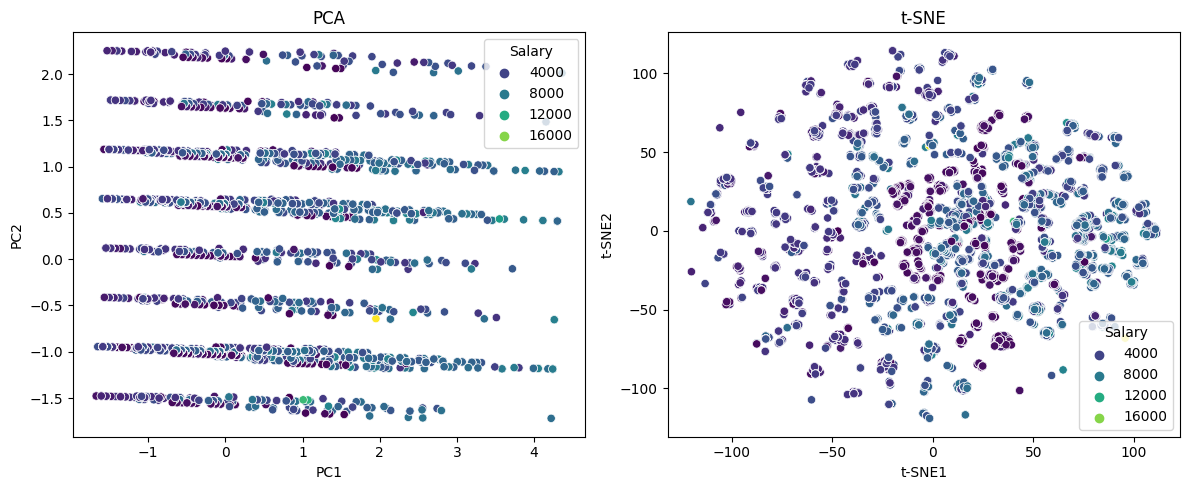

In [182]:
features = data.drop('salary', axis=1)
target = data['salary']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

pca_data = pd.DataFrame({'PC1': pca_result[:, 0], 'PC2': pca_result[:, 1], 'Salary': target})
tsne_data = pd.DataFrame({'t-SNE1': tsne_result[:, 0], 't-SNE2': tsne_result[:, 1], 'Salary': target})

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue='Salary', palette='viridis')
plt.title('PCA')

plt.subplot(1, 2, 2)
sns.scatterplot(data=tsne_data, x='t-SNE1', y='t-SNE2', hue='Salary', palette='viridis')
plt.title('t-SNE')

plt.tight_layout()
plt.show()

#Task 6

In [183]:
features = data.drop('salary', axis=1)
target = data['salary']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(scaled_features)

data['KMeans_Cluster'] = kmeans_labels
data['Agg_Cluster'] = agg_labels

grouped_by_salary = data.groupby('KMeans_Cluster')['salary'].mean()
grouped_by_position = data.groupby('KMeans_Cluster')['position'].value_counts()
grouped_by_location = data.groupby('KMeans_Cluster')['city'].value_counts()

print("Grouped by Salary Level:")
print(grouped_by_salary)
print("\nGrouped by Position:")
print(grouped_by_position)
print("\nGrouped by Location:")
print(grouped_by_location)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Grouped by Salary Level:
KMeans_Cluster
0    3117.786514
1    2974.191142
2    5061.556321
Name: salary, dtype: float64

Grouped by Position:
KMeans_Cluster  position
0               0           1615
                1            904
                2            633
                4            161
                3             85
                5             51
                6             36
1               0           1380
                1            692
                2            618
                4            129
                3            108
                5             40
                6             36
2               1           1157
                4            297
                3            267
                0            213
                6             97
                2              1
                5              1
Name: position, dtype: int64

Grouped by Location:
KMeans_Cluster  city
0               4       1545
                5       1298
          